In [1]:
import csv
import numpy as np
from io import StringIO
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Voice4PD.csv',sep=';',decimal=',',skiprows=1,usecols=[1,2,3,4,5],names=["Classe","Atonie","Debit","Irreg","Puissance"])
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [3]:
print(data.head())

  Classe  Atonie  Debit  Irreg  Puissance
0     HC    2.64   0.73   0.70       0.37
1     HC    0.58   0.55   1.41       1.29
2     HC    1.88   0.73   0.61       1.42
3     HC    0.58   1.53   0.64       1.66
4     HC    1.58   0.73   0.96       0.58


In [4]:
print(data.shape)

(113, 5)


In [5]:
data['Classe']=pd.Categorical(data["Classe"], ordered=False)
print(data.dtypes)

Classe       category
Atonie        float64
Debit         float64
Irreg         float64
Puissance     float64
dtype: object


In [6]:
print(data['Classe'].value_counts())

HC     38
PD     35
MSA    28
PSP    12
Name: Classe, dtype: int64


In [7]:
#print(data.loc[data['Classe']=="MSA",:])

In [8]:

data['Classe']=data['Classe'].cat.rename_categories([0,1,2,3])
""" 1 pour HC, 2 pour MSA, 3 pour PD, 4 pour PSP"""


' 1 pour HC, 2 pour MSA, 3 pour PD, 4 pour PSP'

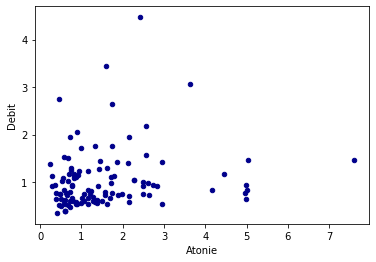

In [9]:
data.plot.scatter(x='Atonie', y='Debit', color='DarkBlue')


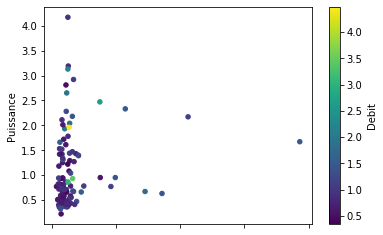

In [10]:
data.plot.scatter(x='Irreg', y='Puissance',c='Debit',colormap='viridis')

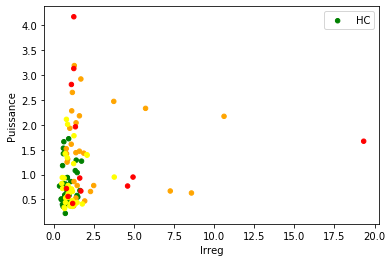

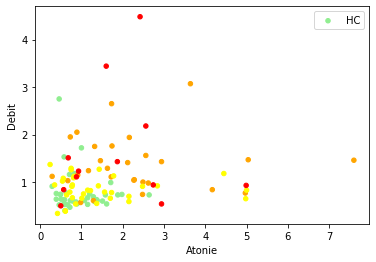

In [25]:
data.plot.scatter(x='Irreg', y='Puissance',
                  c=pd.Series(['green','orange','yellow','red'])[data['Classe']],label='HC')

data.plot.scatter(x='Atonie', y='Debit',
                  c=pd.Series(['LightGreen','orange','yellow','red'])[data['Classe']],label='HC')

In [31]:
data_train,data_test= train_test_split(data, test_size=0.33)

#print(data_train.shape)
#print(data_test.shape)

In [32]:
lda = LinearDiscriminantAnalysis()

x_train=data_train[['Atonie','Debit','Puissance','Irreg']]
x_test=data_test[['Atonie','Debit','Puissance','Irreg']]

classe_test=data_test['Classe']
print(classe_test)

classe_train=data_train['Classe']
print(classe_train)

23     0
69     2
82     2
28     0
34     0
61     1
13     0
63     1
32     0
86     2
42     1
101    3
8      0
98     2
15     0
64     1
103    3
44     1
7      0
5      0
67     2
29     0
2      0
94     2
100    2
57     1
106    3
59     1
81     2
30     0
107    3
111    3
62     1
108    3
95     2
47     1
91     2
73     2
Name: Classe, dtype: category
Categories (4, int64): [0, 1, 2, 3]
76    2
1     0
17    0
90    2
53    1
     ..
40    1
26    0
10    0
48    1
78    2
Name: Classe, Length: 75, dtype: category
Categories (4, int64): [0, 1, 2, 3]


[0.79571779 0.19752552 0.00675669]


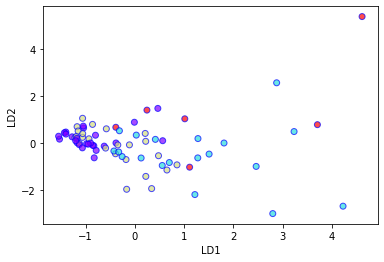

In [33]:
X_lda = lda.fit_transform(x_train, classe_train)
print(lda.explained_variance_ratio_)

#data as a function of the two LDA components
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)


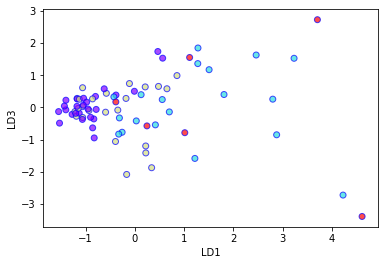

In [34]:
plt.xlabel('LD1')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,0],
    X_lda[:,2],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

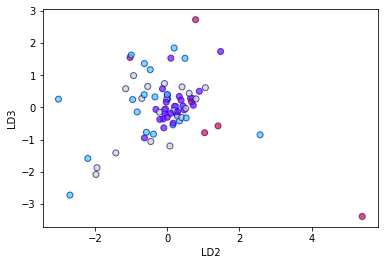

In [35]:
plt.xlabel('LD2')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,1],
    X_lda[:,2],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [36]:
predict_classe=[]
for i in range(x_test.shape[0]):
    predict_classe.append(lda.predict([x_test.iloc[i,:]])[0])

print(predict_classe)
print(classe_test)

[0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 3, 0, 0, 0, 2]
23     0
69     2
82     2
28     0
34     0
61     1
13     0
63     1
32     0
86     2
42     1
101    3
8      0
98     2
15     0
64     1
103    3
44     1
7      0
5      0
67     2
29     0
2      0
94     2
100    2
57     1
106    3
59     1
81     2
30     0
107    3
111    3
62     1
108    3
95     2
47     1
91     2
73     2
Name: Classe, dtype: category
Categories (4, int64): [0, 1, 2, 3]


## ACP

In [38]:
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

In [54]:
#transformation – centrage-réduction
data_CR = sc.fit_transform(data[['Atonie','Debit','Irreg','Puissance']])    #on enlève la variable Classe
print(data_CR)

[[ 8.75211539e-01 -4.84592563e-01 -3.97450852e-01 -9.15395869e-01]
 [-7.65140652e-01 -7.69712978e-01 -8.15455433e-02  3.32827564e-01]
 [ 2.70033061e-01 -4.84592563e-01 -4.37495187e-01  5.09206962e-01]
 [-7.65140652e-01  7.82609280e-01 -4.24147075e-01  8.34830467e-01]
 [ 3.11468197e-02 -4.84592563e-01 -2.81767218e-01 -6.30475303e-01]
 [ 3.49661808e-01 -4.68752540e-01  6.52836846e-02  3.05692272e-01]
 [-1.36073549e-01 -6.42992794e-01 -4.41944557e-01 -3.04851798e-01]
 [-6.53660406e-01 -8.96433163e-01 -3.39609035e-01 -4.94798843e-01]
 [-1.28110675e-01 -6.74672840e-01 -3.75203999e-01 -3.18419445e-01]
 [-8.60695148e-01 -8.17233047e-01 -2.46172253e-01 -7.93287055e-01]
 [-3.74959791e-01 -6.74672840e-01 -3.61855888e-01 -4.40528259e-01]
 [-7.49214902e-01 -1.00731332e+00 -3.26260923e-01 -1.42040046e-01]
 [-8.20880775e-01 -6.27152771e-01 -4.06349593e-01 -8.61125285e-01]
 [-5.18291536e-01 -7.85553001e-01 -1.08241767e-01  4.79069979e-02]
 [-6.61623280e-01  1.96528428e-01 -4.15248334e-01 -9.15395869e

In [55]:
#verif que les moyennes sont presques nulles
print(np.mean(data_CR,axis=0))

[-1.86674668e-17  1.93183719e-16 -9.03898392e-17  5.45286530e-17]


In [56]:
#vérif écart-type unitaire
print(np.std(data_CR,axis=0,ddof=0))

[1. 1. 1. 1.]


In [57]:
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')

print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [59]:
#calculs
coord = acp.fit_transform(data_CR)

#nombre de composantes calculées
print(acp.n_components_) # 4 variables explicatives

4


In [64]:
#valeurs singulières
n=data.shape[0]
print(n)

print(acp.singular_values_**2/n)

113
[1.58820116 0.95586346 0.77325604 0.68267934]


In [68]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

"""la premiere composante concentre 39.7% de l'info,  """

[0.39705029 0.23896586 0.19331401 0.17066984]


"la premiere composante concentre 39.7% de l'info "

In [69]:
#val propres corrigées
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.58820116 0.95586346 0.77325604 0.68267934]


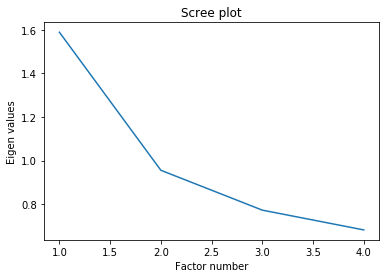

In [73]:
#scree plot: graphique des val propres en fonction des 4 facteurs

p=4    #nb de var explicatives

plt.plot(np.arange(1,p+1),eigval) 
plt.title("Scree plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()